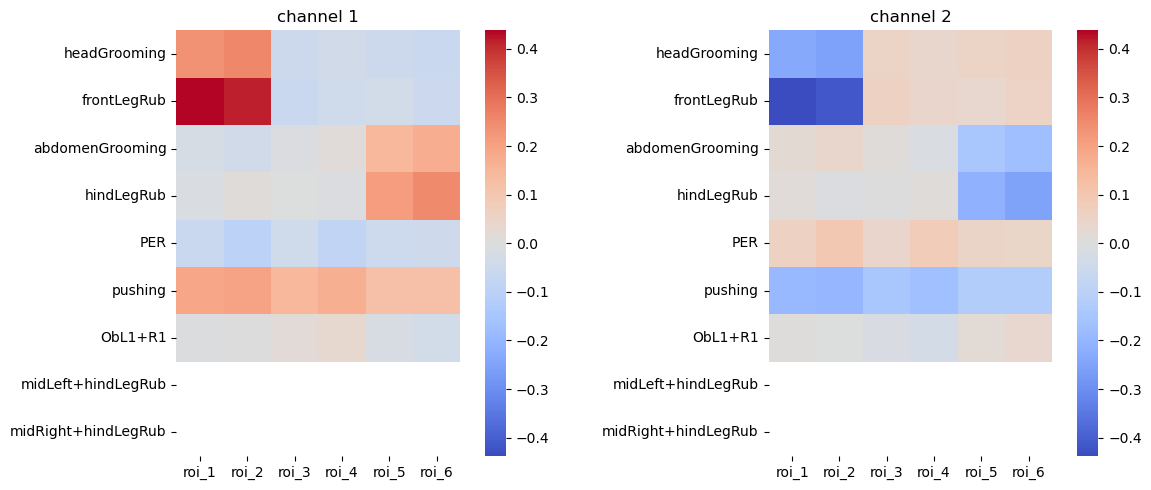

In [20]:
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import numpy as np
import utils as utl

# select trace extraction method here
df1 = pd.read_parquet('./all_data.parquet') # left side
df2 = pd.read_parquet('./all_data.parquet') # right side

# calculate Pearson
d1 = utl.calculate_pearson(df1, 'behi')
d2 = utl.calculate_pearson(df2, 'behi')
d2 = -d2

# select subset of correlation dataframe
cols = ['roi_1', 'roi_2', 'roi_3', 'roi_4', 'roi_5', 'roi_6']
rows = [
    'headGrooming',
    'frontLegRub',
    'abdomenGrooming',
    'hindLegRub',
    'PER',
    'pushing',
    'ObL1+R1',
    'midLeft+hindLegRub',
    'midRight+hindLegRub'
]
d1 = d1.loc[rows, cols]
d2 = d2.loc[rows, cols]

# get global max and min
vmax = np.max([d1.max().max(), d2.max().max()])
vmin = np.min([d1.min().min(), d2.min().min()])

# change figure size here
fig, axarr = plt.subplots(ncols=2, figsize=(12, 5))

ax = axarr[0]
sns.heatmap(ax=ax, data=d1, square=True, cmap='coolwarm', center=0, vmin=vmin, vmax=vmax)
ax.set_title('channel 1')

ax = axarr[1]
sns.heatmap(ax=ax, data=d2, square=True, cmap='coolwarm', center=0, vmin=vmin, vmax=vmax)
ax.set_title('channel 2')

fig.tight_layout()

fig.savefig('./focused_heatmap.svg')